In [2]:
%pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Model Performance Metrics:
                            Model  Accuracy  Precision  Recall  F1-Score
0                     Naive Bayes    0.8853     0.8854  0.8853    0.8853
1                             ANN    0.9077     0.9078  0.9077    0.9077
2                      DistilBERT    0.9379     0.9379  0.9379    0.9379
3  DistilBERT with Sliding Window    0.9393     0.9395  0.9393    0.9393


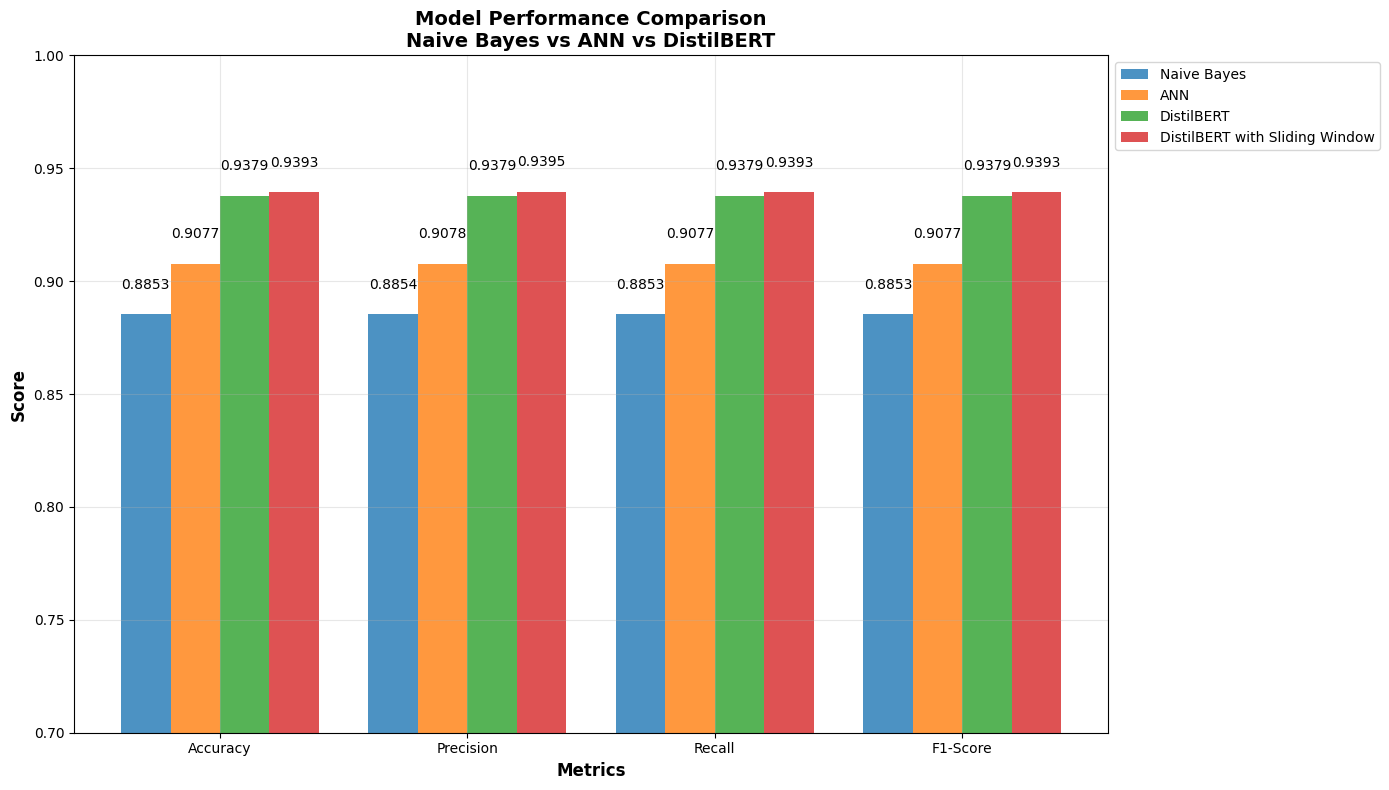

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Hardcoded metrics for the three models
model_data = {
    'Model': ['Naive Bayes', 'ANN', 'DistilBERT', 'DistilBERT with Sliding Window'],
    'Accuracy': [0.8853, 0.9077, 0.9379, 0.9393],
    'Precision': [0.8854, 0.9078, 0.9379, 0.9395],
    'Recall': [0.8853, 0.9077, 0.9379, 0.9393],
    'F1-Score': [0.8853, 0.9077, 0.9379, 0.9393]
}

# Create DataFrame
df = pd.DataFrame(model_data)
print("Model Performance Metrics:")
print(df)

# Set up the plotting style
plt.style.use('default')
fig, ax = plt.subplots(figsize=(14, 8))

# Set the width of bars and positions
bar_width = 0.2
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x = np.arange(len(metrics))

# Create bars for each model
bars1 = ax.bar(x - 1.5*bar_width, df.iloc[0, 1:], bar_width, label=df.iloc[0, 0], alpha=0.8)
bars2 = ax.bar(x - 0.5*bar_width, df.iloc[1, 1:], bar_width, label=df.iloc[1, 0], alpha=0.8)
bars3 = ax.bar(x + 0.5*bar_width, df.iloc[2, 1:], bar_width, label=df.iloc[2, 0], alpha=0.8)
bars4 = ax.bar(x + 1.5*bar_width, df.iloc[3, 1:], bar_width, label=df.iloc[3, 0], alpha=0.8)

# Add value labels on bars
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.4f}', ha='center', va='bottom', fontsize=10)

add_value_labels(bars1)
add_value_labels(bars2)
add_value_labels(bars3)
add_value_labels(bars4)

# Customize the chart
ax.set_xlabel('Metrics', fontsize=12, fontweight='bold')
ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_title('Model Performance Comparison\nNaive Bayes vs ANN vs DistilBERT', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend(loc='upper left', ncol=1, bbox_to_anchor=(1,1))
ax.set_ylim(0.7, 1.)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


BERT Models Comparison:
                            Model  Accuracy  Precision  Recall  F1-Score
2                      DistilBERT    0.9379     0.9379  0.9379    0.9379
3  DistilBERT with Sliding Window    0.9393     0.9395  0.9393    0.9393


<Figure size 1200x800 with 0 Axes>

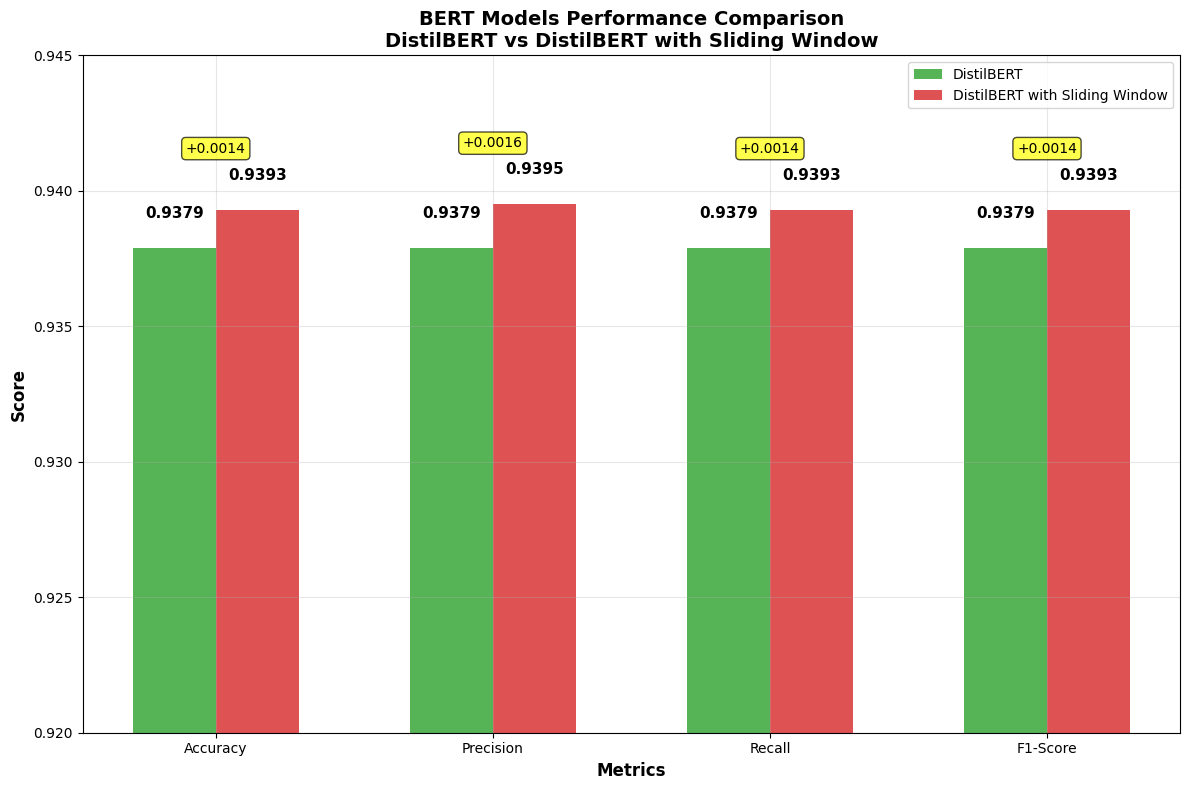

In [12]:
# Create a specific comparison chart for BERT models only
plt.figure(figsize=(12, 8))

# Filter data for BERT models only
bert_data = df[df['Model'].str.contains('DistilBERT')]
print("\nBERT Models Comparison:")
print(bert_data)

# Set up the plotting style
fig, ax = plt.subplots(figsize=(12, 8))

# Set the width of bars and positions
bar_width = 0.3
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x = np.arange(len(metrics))

# Get the default matplotlib color cycle to match the main chart
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Create bars for each BERT model using the same colors as the main chart
# DistilBERT is the 3rd model (index 2) and DistilBERT with Sliding Window is 4th (index 3)
bars1 = ax.bar(x - bar_width/2, bert_data.iloc[0, 1:], bar_width, 
               label=bert_data.iloc[0, 0], alpha=0.8, color=colors[2])
bars2 = ax.bar(x + bar_width/2, bert_data.iloc[1, 1:], bar_width, 
               label=bert_data.iloc[1, 0], alpha=0.8, color=colors[3])

# Add value labels on bars
def add_value_labels_bert(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.001,
                f'{height:.4f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

add_value_labels_bert(bars1)
add_value_labels_bert(bars2)

# Customize the chart
ax.set_xlabel('Metrics', fontsize=12, fontweight='bold')
ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_title('BERT Models Performance Comparison\nDistilBERT vs DistilBERT with Sliding Window', 
             fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend(loc='upper right', ncol=1, bbox_to_anchor=(1,1))
ax.set_ylim(0.92, 0.945)  # Zoom in to show the differences better
ax.grid(True, alpha=0.3)

# Add difference annotations
for i, metric in enumerate(metrics):
    diff = bert_data.iloc[1, i+1] - bert_data.iloc[0, i+1]
    ax.annotate(f'{diff:+.4f}', 
                xy=(i, max(bert_data.iloc[0, i+1], bert_data.iloc[1, i+1]) + 0.002),
                ha='center', va='bottom', fontsize=10, 
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))

plt.tight_layout()
plt.show()